In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()
import numpy as np

In [2]:
f = open('machine-learning-ex1/ex1/ex1data1.txt', 'r')
X, y = np.loadtxt(f, delimiter=',', usecols=(0, 1), unpack=True)
X = X.reshape([97,1])
y = y.reshape([97, 1])

# Add the column of 1's to the training data
ones = np.ones([97,1])
X = np.hstack((ones, X))



In [3]:
# Weights array initialised to zeros
weights =  np.zeros([2, 1])

# This uses mean squared errors as the error metric. This is often called J(theta) in formal notation
def costFunction(X, y, weights):
    currentCost = 0
    for pointIndex, point in enumerate(X):
        
        # Adding the squared error to the current sum total
        currentCost += (np.dot(point, weights) - y[pointIndex])**2
        
    meanSquaredErrors = currentCost / (np.shape(X)[0] * 2)
    
    return meanSquaredErrors
    

# Returns a new weights vector updated with 1 run of batch gradient decent
def gradientDecent(X, y, weights):   

    # IMPORTANT. If the learning rate is too high, the algorithm will not find the optimum and tends to explode.
    # Too small and the algorithm will take a long time finding the optimum
    learningRate = 0.01
    
    tempWeights = np.copy(weights)
    
    # Calcuate the new weights. All weight updates are applied simultaniously
    for weightIndex, j in enumerate(weights):
        currentSum = 0
        
        # As this is batch gradient decent we will use all examples for updating the weight
        for pointIndex, point in enumerate(X): 

            # This is the partial differential for each weight/coefficent. 
            # They are summed over every example and then averaged later
            differential = (np.dot(point, weights) - y[pointIndex]) * point[weightIndex]
            currentSum += differential
 
        # Average the partial differentials and muultiply by the learning rate.
        tempWeights[weightIndex] = j - ((currentSum / np.shape(X)[0]) * learningRate)
    return tempWeights            
   
# Perfrom the algorithm so many times. May be better to add a termination check in the algortithm function
# Would check for the update term being below a threshold for termination.
costArray = np.zeros([0,1])
for i in range(1500):
    #updates the weights variable with the updated weigths returned by the algorithm
    weights =  gradientDecent(X, y, weights)
    
    # Gets the current mean squared error of the weights and appends it to the costArray for logging
    cost = np.array([costFunction(X, y, weights)])
    costArray = np.append(costArray, cost)

       

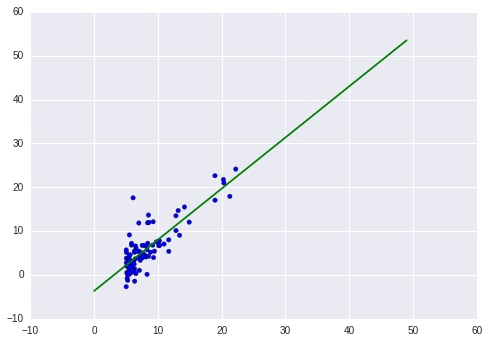

In [4]:
plt.scatter(X[:, 1], y[:,0])

# Build an X array for plotting the found function. Should be a column of 1's and a range of 0-50
foundFunctionX = np.arange(50).reshape(50,1)
ones = np.ones([50,1])
foundFunctionX = np.hstack((ones, foundFunctionX))

# Use built X array with the found weights to generate the accociated y values. Then plot on a graph
foundFunctionY = np.dot(foundFunctionX, weights)
plt.plot(foundFunctionX[:,1], foundFunctionY, "g")



(100, 100)


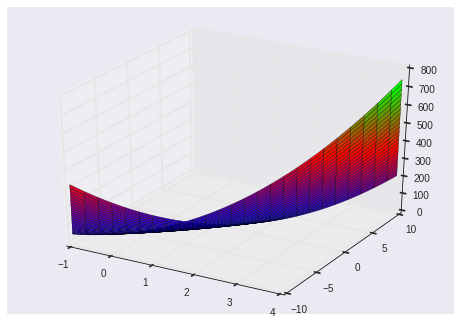

[[ 328.09290555  316.6648683   305.44447299 ...,  186.35412584
   195.06735595  203.98822799]
 [ 323.26504192  311.92025945  300.7831189  ...,  189.60197489
   198.39845977  207.40258658]
 [ 318.47799046  307.21646275  296.16257698 ...,  192.89063611
   201.77037576  210.85775734]
 ..., 
 [  49.81156018   46.45923561   43.31455298 ...,  691.41691065
   708.20585345  725.20243817]
 [  48.94247627   45.67340647   42.61197861 ...,  698.62353943
   715.49573699  732.57557648]
 [  48.11420452   44.9283895    41.95021641 ...,  705.87098036
   722.82643269  739.98952696]]


In [9]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros([np.size(theta0_vals), np.size(theta1_vals)])

for i in range(np.size(theta0_vals)):
    for j in range(np.size(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = costFunction(X, y, t) 
        
print(np.shape(J_vals))
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(theta1_vals, theta0_vals, J_vals, rstride=4, cstride=4, cmap="brg")
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.show()

print(J_vals)

            
#print(np.array([theta0_vals[1], theta1_vals[1]]))
